In [319]:
import numpy as np
import math
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
number_large_trucks = 100
number_small_trucks = 500

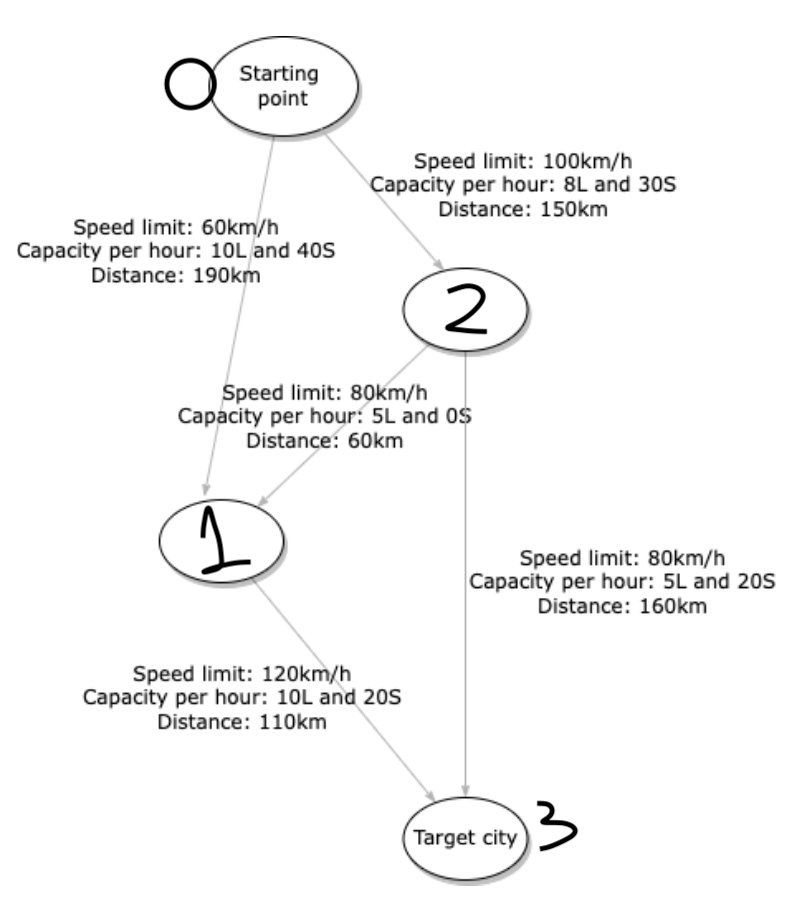

In [9]:
from IPython.display import Image
Image(filename='roads_1.png')

# task 1: as fast as possible 

In [230]:
n = 500
times = []
for i in range(n+1):
    l = i
    r = n-i
    left_1 = math.ceil(l/(40))#сколько партий будет на 01
    left_t_1 = float(190)/float(60)
    left_2 = math.ceil(l/(20))#сколько партий будет на 13
    left_t_2 = float(110)/float(120)
    time_left = left_1 - 1 + left_t_1 + max(0, left_2 - left_1) + left_t_2
    # это время, которое мы потратим от старта в 0 до финиша в 3, на прохождение по левой ветви
    # по сути это будет время, за которое самая последняя партия грузовиков доедет до target city
    # left_1 - 1 -это количество часов, которое последней партии придется ждать в starting point(это количество партий - 1)
    # left_t_1 -это время, которое грузовик потратит на дистанцию от 0 до 1
    # max(0, left_2 - left_1) -это время, которое грузовику придется ждать в пункте 1, так как партии на следующий этап меньше и их больше -> очередь будет на (1 час)*(left_2 - left_1) 
    # left_t_2 -это время, которое грузовик потратит на дистанцию от 1 до 3
    right_1 = math.ceil(r/(30))
    right_t_1 = float(150)/float(100)
    right_2 = math.ceil(r/(20))
    right_t_2 = float(160)/float(80)
    time_right = max(0, right_2 - right_1) + right_1 - 1 + right_t_1 + right_t_2
    time = max(time_left, time_right)
    times.append(time)
    
print(times.index(min(times)))

240


In [231]:
times[times.index(min(times))]

15.5

то есть 240 грузовичков поедут по левому пути и 260 по правому

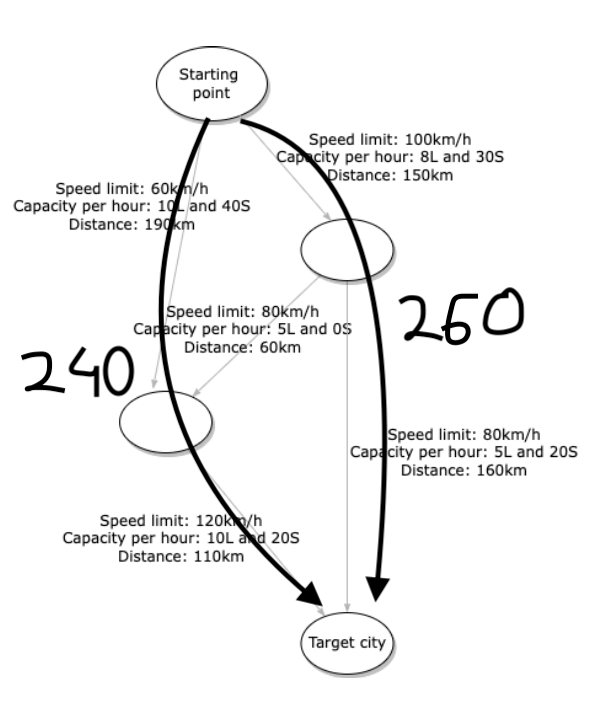

In [302]:
Image(filename='roads3.png')

получаем, что за 15 с половиной часов оптимально управимся с задачей для small trucks

в случае с large trucks у нас есть 3 пути

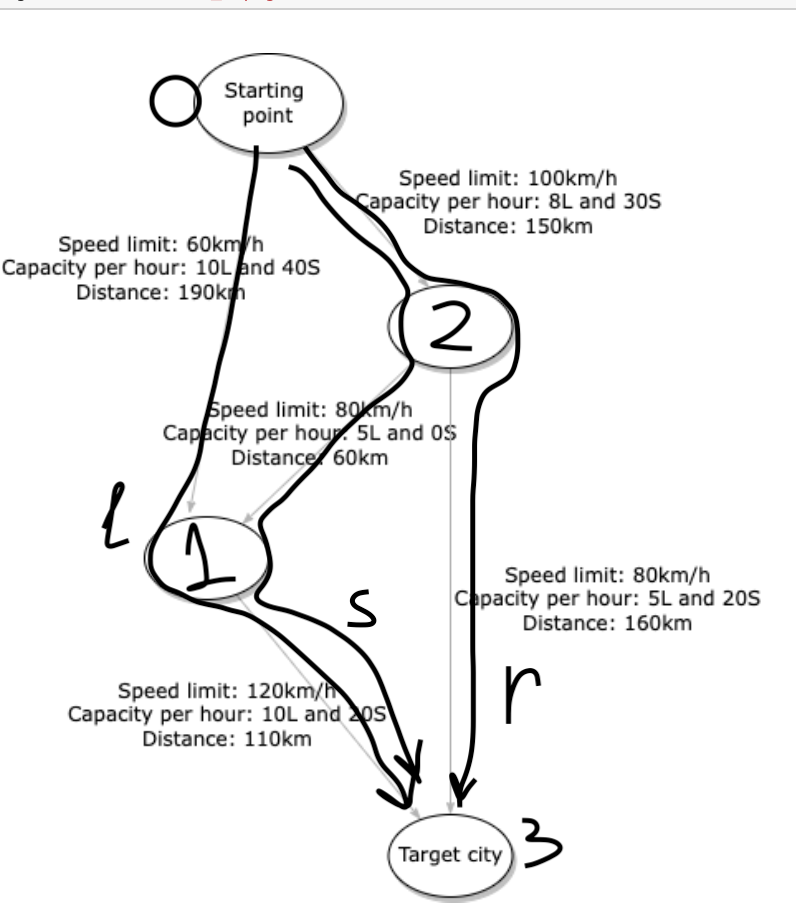

In [287]:
Image(filename='roads_2.png')

In [300]:
n = 100
times = np.ones((n+1, n+1))
times = times*1e10
min_time = 1e100
min_time_index = np.ones(3)
for l in range(n+1):
    for r in range(n+1-l):
        s = n-l-r
        count_02 = math.ceil((r+s)/(8))
        count_01 = math.ceil(l/(10))
        count_21 = math.ceil(s/(5))
        count_23 = math.ceil((r)/(5))
        count_13 = math.ceil((l+s)/(10))
        #таким образом поняли сколько "партий" будет на каждой дороге
        t_left = (count_01 - 1)  + max(count_21-count_02,0) + float(190)/float(60)   +   max((count_13 - max(count_01,count_21)), 0) + float(110)/float(120)
        t_right = (count_02 - 1)   +   float(150)/float(100)  +  max((count_23 - count_02),0) + float(160)/float(80)
        #выразили время по такой же логике, которая была в случае с двумя путями, только немного усложнили
        t_general =  max(t_left,t_right)
        if t_general<min_time:
            min_time = t_general
            min_time_index[0] = l
            min_time_index[1] = s
            min_time_index[2] = r
        times[l][r] = t_general
    
print(np.min(times))
print(min_time_index)

9.5
[44. 36. 20.]


оптимально, чтобы по первому пути поехали 44 грузовика, по второму 36, по третьему 20

# Получаем ответ для первой задачи MAX(9.5 hours, 15.5 hours) = 15.5 hours

# task 2: fuel costs

a) we have 50 hours

в наших допущениях: потратить наименьшее количество топлива = чтобы в сумме грузовики проехали наименьшее количество километров

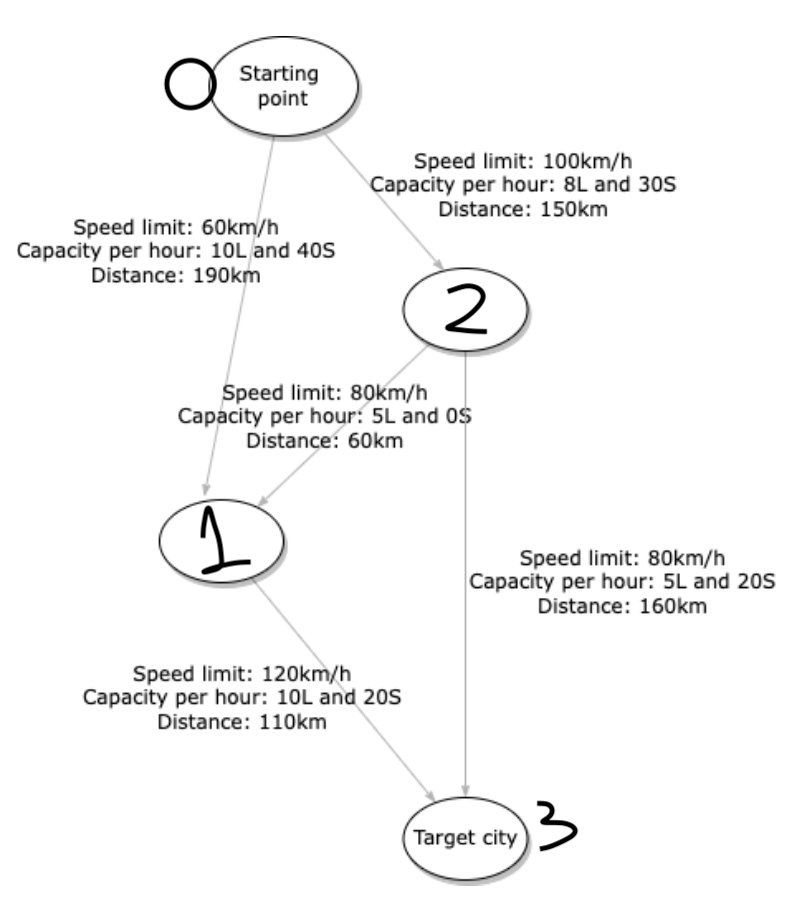

In [306]:
Image(filename='roads_1.png')

как мы видим, наименьшая протяженность для small trucks: 300km
будем максимизировать целый параметр lambda: lambda small trucks едут по левому пути и 500-lambda по правому таким образом, чтобы соблюдались временные ограничения

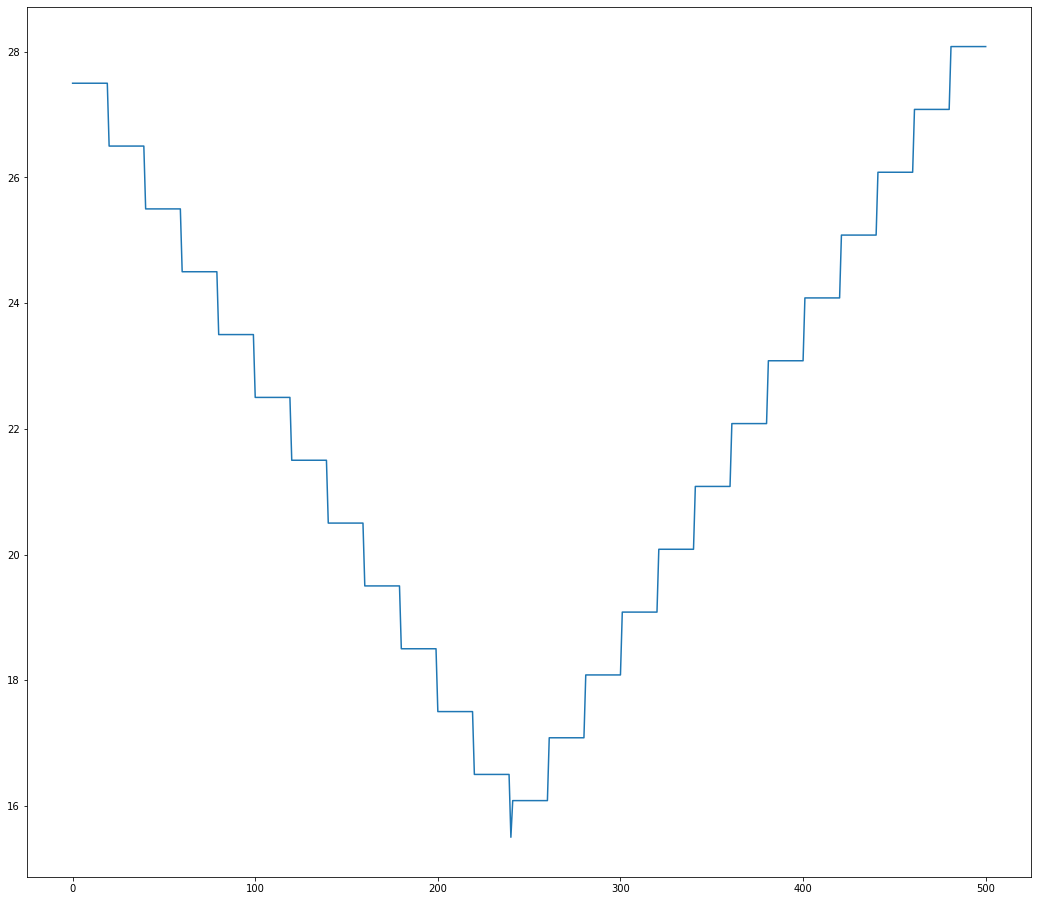

In [311]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
n = 500
times = []
for i in range(n+1):
    l = i
    r = n-i
    left_1 = math.ceil(l/(40))#сколько партий там будет
    #это количество партий займет время 
    left_t_1 = float(190)/float(60)
    #time_left_1 = left_t_1 + (left_1-1)*1
    left_2 = math.ceil(l/(20))#сколько партий там будет
    #это количество партий займет время 
    left_t_2 = float(110)/float(120)
    time_left = left_1 - 1 + left_t_1 + max(0, left_2 - left_1) + left_t_2 #max(0, left_2 - left_1) + left_1 - 1 + left_t_1 + left_t_2 
    #left_t_1 + (left_1 - 1)*1 + max(0, (left_2-1)*1 - (left_1 - 1)*1) + left_t_2#сколько ждать max(0, (left_2-1)*1 - (left_1 - 1)*1)
    #left_t_1 + (left_1-1)*1
    
    right_1 = math.ceil(r/(30))#сколько партий там будет
    #это количество партий займет время 
    right_t_1 = float(150)/float(100)
    #time_left_1 = left_t_1 + (left_1-1)*1
    right_2 = math.ceil(r/(20))#сколько партий там будет
    #это количество партий займет время 
    right_t_2 = float(160)/float(80)
    time_right = max(0, right_2 - right_1) + right_1 - 1 + right_t_1 + right_t_2
    time = max(time_left, time_right)
    times.append(time)


fig, ax = plt.subplots(figsize=(18, 16))
ax.plot(range(n+1), times)
#print(times)

Как мы видим, для small trucks мы с запасом укладываемся в наши временные ограничения. Поэтому мы пускаем все 500 грузовиков по короткому пути.

Для large trucks путь также является самым коротким, посмотрим, что будет, если пустить все грузовики по нему

In [317]:
n = 100
times = np.ones((n+1, n+1))
times = times*1e10
min_time = 1e100
min_time_index = np.ones(3)
for l in range(n+1):
        s = 0
        к = 0
        count_02 = math.ceil((r+s)/(8))
        count_01 = math.ceil(l/(10))
        count_21 = math.ceil(s/(5))
        count_23 = math.ceil((r)/(5))
        count_13 = math.ceil((l+s)/(10))
        t_left = (count_01 - 1)  + max(count_21-count_02,0) + float(190)/float(60)   +   max((count_13 - max(count_01,count_21)), 0) + float(110)/float(120)
        t_right = (count_02 - 1)   +   float(150)/float(100)  +  max((count_23 - count_02),0) + float(160)/float(80)
        t_general =  max(t_left,t_right)
        if t_general<min_time:
            min_time = t_general
            min_time_index[0] = l
            min_time_index[1] = s
            min_time_index[2] = r
        times[l][r] = t_general

print(times[100][0])

13.083333333333332


Получаем, что при условии, что T не превосходит 50 часов, у нас получается, что мы запускаем все грузовики по пути протяженностью 300km

# Неудачные попытки сделать решение более красивым методом:

Рассмотрим попытку решить первую задачу(минимизировать время) для large trucks с помощью прогона алгоритма Дейкстры для каждого отдельного грузовика

попробовал переделать алгоритм Дейкстры таким образом, чтобы учитывались необходимые задержки, но это не привело к хорошим результатам, потому что не получилось продумать логику "обнуления" очереди

In [321]:
import sys

class Graph(object):
    def __init__(self, nodes, init_graph, init_decay):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        self.decay = self.construct_decay(nodes, init_decay)
        
    def construct_graph(self, nodes, init_graph):
        graph = {}
        for node in nodes:
            graph[node] = {}
            
        
        graph.update(init_graph)
        
        #print(graph.items())
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
        return graph
    
    def construct_decay(self, nodes, init_decay):
        decay = {}
        for node in nodes:
            decay[node] = {}
            
        
        decay.update(init_decay)
        
        #print(decay.items())
        for node, edges in decay.items():
            for adjacent_node, value in edges.items():
                if decay[adjacent_node].get(node, False) == False:
                    decay[adjacent_node][node] = value
        return decay
    
    def get_nodes(self):
        return self.nodes
    
    def get_outgoing_edges(self, node):
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    def value_decay(self, node1, node2):
        "Возвращает задержку ребра между двумя узлами."
        return self.decay[node1][node2]  
    
    def value(self, node1, node2):
        "Возвращает значение ребра между двумя узлами."
        return self.graph[node1][node2]
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # Мы будем использовать этот словарь, чтобы сэкономить на посещении каждого узла и обновлять его по мере продвижения по графику 
    shortest_path = {}
 
    # Мы будем использовать этот dict, чтобы сохранить кратчайший известный путь к найденному узлу
    previous_nodes = {}
 
    # Мы будем использовать max_value для инициализации значения "бесконечности" непосещенных узлов   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # Однако мы инициализируем значение начального узла 0  
    shortest_path[start_node] = 0
    
    # Алгоритм выполняется до тех пор, пока мы не посетим все узлы
    while unvisited_nodes:
        # Приведенный ниже блок кода находит узел с наименьшей оценкой
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # Приведенный ниже блок кода извлекает соседей текущего узла и обновляет их расстояния
        neighbors = graph.get_outgoing_edges(current_min_node)
        #for neighbor in neighbors:
        #    graph.value_decay(current_min_node, neighbor)
        
        our_decay = 0
        
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)# + graph.value_decay(current_min_node, neighbor)
            if graph.value_decay(current_min_node, neighbor) > our_decay:
                if tentative_value+graph.value_decay(current_min_node, neighbor)< shortest_path[neighbor]:
                    shortest_path[neighbor] = tentative_value
                    previous_nodes[neighbor] = current_min_node
                our_decay = graph.value_decay(current_min_node, neighbor)
            else:
                if tentative_value< shortest_path[neighbor]:
                    shortest_path[neighbor] = tentative_value
                    previous_nodes[neighbor] = current_min_node
 
        # После посещения его соседей мы отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path
def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
   # Добавить начальный узел вручную
    path.append(start_node)
    
    print("Найден следующий лучший маршрут с ценностью {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path))) 
    return list(reversed(path))

nodes = ["0", "1", "2", "3"]
 
init_graph = {}
init_decay = {}
init_graph_start = {}

for node in nodes:
    init_graph[node] = {}
    init_graph_start[node] = {}
    init_decay[node] = {}

limit_large = np.zeros((4,4))
limit_small = np.zeros((4,4))

limit_large[0][1] = 10 
limit_large[0][2] = 8
limit_large[2][1] = 5
limit_large[1][3] = 10
limit_large[2][3] = 5

count = np.zeros((4,4))

count[0][1] = 0
count[0][2] = 0
count[2][1] = 0
count[1][3] = 0
count[2][3] = 0

init_decay["0"]["1"] = 0
init_decay["0"]["2"] = 0
init_decay["2"]["1"] = 0
init_decay["1"]["3"] = 0
init_decay["2"]["3"] = 0

init_graph["0"]["1"] = float(190)/float(60)
init_graph["0"]["2"] = float(150)/float(100)
init_graph["2"]["1"] = float(60)/float(80)
init_graph["1"]["3"] = float(110)/float(120)
init_graph["2"]["3"] = float(160)/float(80) 

init_graph_start["0"]["1"] = float(190)/float(60)
init_graph_start["0"]["2"] = float(150)/float(100)
init_graph_start["2"]["1"] = float(60)/float(80)
init_graph_start["1"]["3"] = float(110)/float(120)
init_graph_start["2"]["3"] = float(160)/float(80) 
for i in range(number_large_trucks):
    for temp in range(number_large_trucks):
        for h in range(4):
            for k in range(4):
                if count[h][k] == limit_large[h][k] and limit_large[h][k]>0:
                    init_decay[str(h)][str(k)] = init_decay[str(h)][str(k)]+init_graph_start[str(h)][str(k)]
    
    graph = Graph(nodes, init_graph, init_decay)
    previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="0")
    tmp = print_result(previous_nodes, shortest_path, start_node="0", target_node="3")
    for k in range(1, len(tmp)):
        a, b = tmp[k-1] ,tmp[k]
        count[int(a)][int(b)] = count[int(a)][int(b)] + 1
    print(i) 



Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
0
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
1
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
2
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
3
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
4
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
5
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
6
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
7
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
8
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
9
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
10
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
11
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
12
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
13
Найден следующ

In [323]:
import sys

class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    
    def get_nodes(self):
        return self.nodes
    
    def get_outgoing_edges(self, node):
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        return self.graph[node1][node2]
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # Мы будем использовать этот словарь, чтобы сэкономить на посещении каждого узла и обновлять его по мере продвижения по графику 
    shortest_path = {}
 
    # Мы будем использовать этот dict, чтобы сохранить кратчайший известный путь к найденному узлу
    previous_nodes = {}
 
    # Мы будем использовать max_value для инициализации значения "бесконечности" непосещенных узлов   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # Однако мы инициализируем значение начального узла 0  
    shortest_path[start_node] = 0
    
    # Алгоритм выполняется до тех пор, пока мы не посетим все узлы
    while unvisited_nodes:
        # Приведенный ниже блок кода находит узел с наименьшей оценкой
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # Приведенный ниже блок кода извлекает соседей текущего узла и обновляет их расстояния
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                previous_nodes[neighbor] = current_min_node
 
        # После посещения его соседей мы отмечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path
def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
   # Добавить начальный узел вручную
    path.append(start_node)
    
    print("Найден следующий лучший маршрут с ценностью {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path))) 
    return list(reversed(path))
nodes = ["0", "1", "2", "3"]
 
init_graph = {}
init_graph_start = {}
for node in nodes:
    init_graph[node] = {}
    init_graph_start[node] = {}

limit_large = np.zeros((4,4))
limit_small = np.zeros((4,4))

limit_large[0][1] = 10 
limit_large[0][2] = 8
limit_large[2][1] = 5
limit_large[1][3] = 10
limit_large[2][3] = 5

count = np.zeros((4,4))
count[0][1] = 0
count[0][2] = 0
count[2][1] = 0
count[1][3] = 0
count[2][3] = 0
init_graph["0"]["1"] = float(190)/float(60)
init_graph["0"]["2"] = float(150)/float(100)
init_graph["2"]["1"] = float(60)/float(80)
init_graph["1"]["3"] = float(110)/float(120)
init_graph["2"]["3"] = float(160)/float(80) 
init_graph_start["0"]["1"] = float(190)/float(60)
init_graph_start["0"]["2"] = float(150)/float(100)
init_graph_start["2"]["1"] = float(60)/float(80)
init_graph_start["1"]["3"] = float(110)/float(120)
init_graph_start["2"]["3"] = float(160)/float(80) 
for i in range(number_large_trucks):
    for h in range(4):
        for k in range(4):
            if count[h][k] == limit_large[h][k] and limit_large[h][k]>0:
                init_graph[str(h)][str(k)] = init_graph[str(h)][str(k)]  + init_graph_start[str(h)][str(k)]
    graph = Graph(nodes, init_graph)
    previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="0")
    tmp = print_result(previous_nodes, shortest_path, start_node="0", target_node="3")
    for k in range(1, len(tmp)):
        a, b = tmp[k-1] ,tmp[k]
        count[int(a)][int(b)] = count[int(a)][int(b)] + 1
    #graph = Graph(nodes, init_graph)
    #previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="0")
    #print_result(previous_nodes, shortest_path, start_node="0", target_node="3")
    print(i) 

limit_small[0][1] = 40
limit_small[0][2] = 30
limit_small[2][1] = 0
limit_small[1][3] = 20
limit_small[2][3] = 20
count[0][1] = 0
count[0][2] = 0
count[2][1] = 0
count[1][3] = 0
count[2][3] = 0
init_graph["0"]["1"] = float(190)/float(60)
init_graph["0"]["2"] = float(150)/float(100)
init_graph["2"]["1"] = 1e10
init_graph["1"]["3"] = float(110)/float(120)
init_graph["2"]["3"] = float(160)/float(80)
init_graph_start["0"]["1"] = float(190)/float(60)
init_graph_start["0"]["2"] = float(150)/float(100)
init_graph_start["2"]["1"] = float(60)/float(80)
init_graph_start["1"]["3"] = float(110)/float(120)
init_graph_start["2"]["3"] = float(160)/float(80) 
for i in range(number_small_trucks):
    for h in range(4):
        for k in range(4):
            if count[h][k] == limit_small[h][k] and limit_small[h][k]>0:
                init_graph[str(h)][str(k)] = init_graph[str(h)][str(k)]  + init_graph_start[str(h)][str(k)]
    graph = Graph(nodes, init_graph)
    previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="0")
    tmp = print_result(previous_nodes, shortest_path, start_node="0", target_node="3")
    for k in range(1, len(tmp)):
        a, b = tmp[k-1] ,tmp[k]
        count[int(a)][int(b)] = count[int(a)][int(b)] + 1
    #graph = Graph(nodes, init_graph)
    #previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="0")
    #print_result(previous_nodes, shortest_path, start_node="0", target_node="3")
    print(i) 

Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
0
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
1
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
2
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
3
Найден следующий лучший маршрут с ценностью 3.1666666666666665.
0 -> 2 -> 1 -> 3
4
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
5
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
6
Найден следующий лучший маршрут с ценностью 3.5.
0 -> 2 -> 3
7
Найден следующий лучший маршрут с ценностью 4.083333333333333.
0 -> 1 -> 3
8
Найден следующий лучший маршрут с ценностью 4.083333333333333.
0 -> 1 -> 3
9
Найден следующий лучший маршрут с ценностью 4.083333333333333.
0 -> 1 -> 3
10
Найден следующий лучший маршрут с ценностью 4.083333333333333.
0 -> 1 -> 3
11
Найден следующий лучший маршрут с ценностью 4.083333333333333.
0 -> 1 -> 3
12
Найден с

Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
285
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
286
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
287
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
288
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
289
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
290
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
291
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
292
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
293
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
294
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
295
Найден следующий лучший маршрут с ценностью 8.166666666666666.
0 -> 1 -> 3
296
Найден следующий лучший маршрут с ценностью 8.166666